In [50]:
import pandas as pd
import numpy as np

#read data
df = pd.read_csv("transactions.csv",sep=",",parse_dates=["Date"], dayfirst=True, dtype={"Category": "string", "Amount": "float","Type": "string"}) 
df.head()

,Date,Category,Amount,Type
0,2020-01-02,Food & Drink,1485.69,Expense
1,2020-01-02,Utilities,1475.58,Expense
2,2020-01-04,Rent,1185.08,Expense
3,2020-01-05,Investment,2291.00,Income
4,2020-01-13,Food & Drink,1126.88,Expense


In [51]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df["Category"].unique())
print(df["Type"].value_counts())

(1500, 4)
Date        datetime64[ns]
Category    string[python]
Amount             float64
Type        string[python]
dtype: object
Date        0
Category    0
Amount      0
Type        0
dtype: int64
<StringArray>
[    'Food & Drink',        'Utilities',             'Rent',
       'Investment',         'Shopping',            'Other',
    'Entertainment', 'Health & Fitness',           'Salary',
           'Travel']
Length: 10, dtype: string
Type
Expense    1222
Income      278
Name: count, dtype: Int64


In [52]:
#drop where date/category/type is null, if amt is null substitue with median
df = df.dropna(subset=["Date", "Category", "Type", "Amount"])
# df["Amount"] = df["Amount"].fillna(df["Amount"].median())

In [53]:
#fix logical inconsistencies (salary is marked as 'expense' in data and 'investment' is marked as 'income')
income_categories = ["Salary"]
expense_categories = ["Investment"]

df.loc[df["Category"].isin(income_categories), "Type"] = "Income"
df.loc[df["Category"].isin(expense_categories), "Type"] = "Expense"

In [54]:
#store date feature (if transaction time included maja aata)
# df["Year"] = df["Date"].dt.year
# df["Month"] = df["Date"].dt.month
# df["Month_Name"] = df["Date"].dt.month_name()
# df["Day"] = df["Date"].dt.day
# df

In [55]:
df = df.sort_values(by="Date", ascending=False).reset_index(drop=True)
df[["Date", "Category", "Amount", "Type"]].head()

,Date,Category,Amount,Type
0,2024-12-29,Other,1480.00,Income
1,2024-12-29,Shopping,655.78,Expense
2,2024-12-28,Investment,1425.00,Expense
3,2024-12-28,Entertainment,727.25,Expense
4,2024-12-28,Rent,514.09,Expense


In [59]:
max_date = df["Date"].max()
lm = df[df["Date"] >=(max_date - pd.Timedelta(days=30))].copy()
#find last_month

In [60]:
total_lm_income = lm[lm["Type"] == "Income"]["Amount"].sum()
total_lm_expense = lm[lm["Type"] == "Expense"]["Amount"].sum()
net_cash_flow = df.loc[df["Type"]=="Income","Amount"].sum() - df.loc[df["Type"]=="Expense","Amount"].sum()

print(f"Net Cash Flow: {net_cash_flow:.2f}")
print("Last Month (30 days) Summary:")
print(f"Total Income: {total_lm_income:.2f}")
print(f"Total Expense: {total_lm_expense:.2f}")
print(f"Net Savings: {total_lm_income - total_lm_expense:.2f}")


Net Cash Flow: -921504.27
Last Month (30 days) Summary:
Total Income: 7346.29
Total Expense: 14390.57
Net Savings: -7044.28


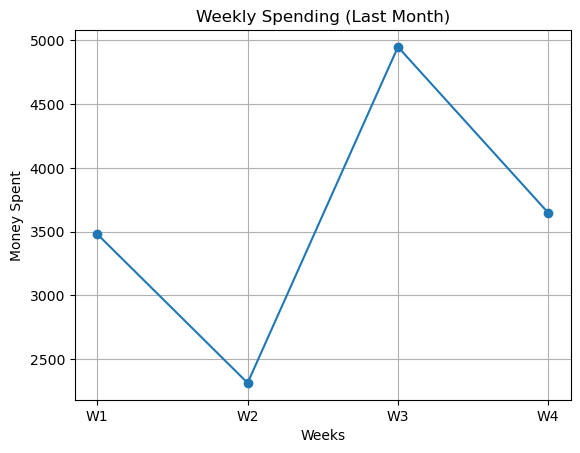

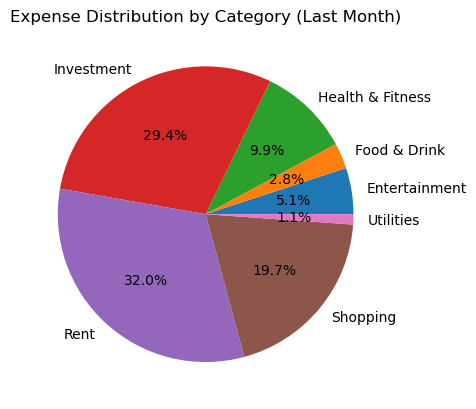

In [69]:
import matplotlib.pyplot as plt

min_date = lm["Date"].min()
lm["Week"] = ((lm["Date"] - min_date).dt.days // 7 + 1).clip(upper=4)
lm["Week_Label"] = "W" + lm["Week"].astype(str)

weekly_spending = (lm[lm["Type"] == "Expense"].groupby("Week_Label")["Amount"].sum().reindex(["W1", "W2", "W3", "W4"], fill_value=0))

plt.figure()
plt.plot(weekly_spending.index, weekly_spending.values, marker='o')
plt.title("Weekly Spending (Last Month)")
plt.xlabel("Weeks")
plt.ylabel("Money Spent")
plt.grid(True)
plt.show()


category_spend = lm[lm["Type"] == "Expense"].groupby("Category")["Amount"].sum()

plt.figure()
plt.pie(category_spend, labels=category_spend.index, autopct='%1.1f%%')
plt.title("Expense Distribution by Category (Last Month)")
plt.show()